In [1]:
# Ejemplo "cancer": demostrar cómo se puede usar scikit-learn para crear un modelo de
#   clasificación que pueda distinguir entre tumores de mama benignos y malignos con base
#   en cierta características de las células.
# El Dataset contiene características de imágenes digitalizadas de aspirado con aguja fina
#   (FNA) de masas mamarias. Incluye 569 instancias, cada una con 30 características cómo: 
#  - Radio ( media de la distancia desde el centre a los puntos del perímetro)
#  - Textura ( desviación estándar de los valores de escala de gris )
#  - Perímetro - Área - Suavidad - Compacidad - Concavidad - Puntos cóncavos - Simetría - Etc

In [2]:
# Importamos las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.inspection import permutation_importance

In [3]:

# Paso 1: Carga de datos
# Cargamos el dataset de Cáncer de Mama de Wisconsin
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [4]:

# Imprimimos información sobre el dataset
print("Información del dataset de Cáncer de Mama:")
print(f"Número de muestras: {X.shape[0]}")
print(f"Número de características: {X.shape[1]}")
print(f"Clases: {np.unique(y)}")
print(f"Nombres de las clases: {cancer.target_names}")

Información del dataset de Cáncer de Mama:
Número de muestras: 569
Número de características: 30
Clases: [0 1]
Nombres de las clases: ['malignant' 'benign']


In [5]:
# Paso 2: Preprocesamiento de datos
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])


Tamaño del conjunto de entrenamiento: 455
Tamaño del conjunto de prueba: 114


In [6]:
# Estandarizamos las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Paso 3: Selección y entrenamiento del modelo
# Usaremos un clasificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [9]:
# Entrenamos el modelo
rf_classifier.fit(X_train_scaled, y_train)

print("\nModelo Random Forest entrenado.")


Modelo Random Forest entrenado.


In [10]:
# Paso 4: Evaluación del modelo
# Hacemos predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test_scaled)

In [11]:
# Calculamos y mostramos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(cm)


Matriz de confusión:
[[40  3]
 [ 1 70]]


In [12]:
# Mostramos el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))


Informe de clasificación:
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [13]:
# Paso 5: Importancia de características
# Calculamos la importancia de las características usando permutation importance
perm_importance = permutation_importance(rf_classifier, X_test_scaled, y_test, n_repeats=10, random_state=42)

In [14]:
# Ordenamos las características por importancia
feature_importance = perm_importance.importances_mean
sorted_idx = feature_importance.argsort()

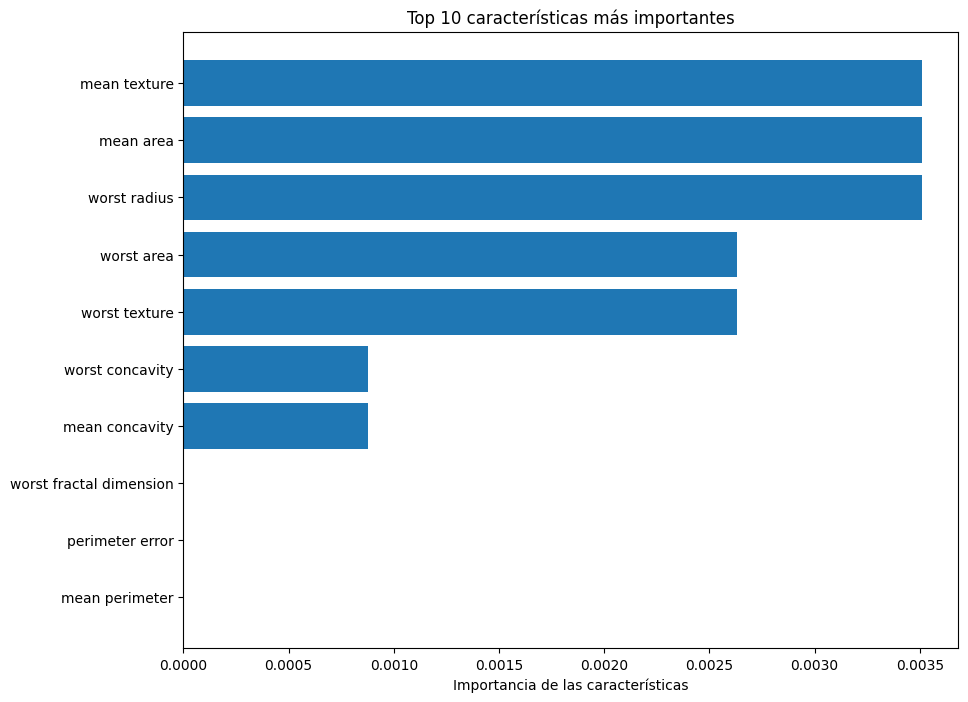

In [15]:
# Visualizamos la importancia de las características
plt.figure(figsize=(10, 8))
plt.barh(range(10), feature_importance[sorted_idx][-10:])
plt.yticks(range(10), [cancer.feature_names[i] for i in sorted_idx[-10:]])
plt.xlabel("Importancia de las características")
plt.title("Top 10 características más importantes")
plt.show()

In [16]:
# Paso 6: Interpretación
print("\nInterpretación de los resultados:")
print("1. El modelo Random Forest ha logrado una buena precisión en la clasificación de tumores malignos y benignos.")
print("2. La matriz de confusión muestra cuántos casos fueron clasificados correctamente para cada clase.")
print("3. El informe de clasificación proporciona métricas detalladas, incluyendo precisión, recall y F1-score para cada clase.")
print("4. La visualización de importancia de características nos muestra qué atributos son más relevantes para la clasificación.")

accuracy = np.sum(np.diag(cm)) / np.sum(cm)
print(f"\nPrecisión global del modelo: {accuracy:.2f}")


Interpretación de los resultados:
1. El modelo Random Forest ha logrado una buena precisión en la clasificación de tumores malignos y benignos.
2. La matriz de confusión muestra cuántos casos fueron clasificados correctamente para cada clase.
3. El informe de clasificación proporciona métricas detalladas, incluyendo precisión, recall y F1-score para cada clase.
4. La visualización de importancia de características nos muestra qué atributos son más relevantes para la clasificación.

Precisión global del modelo: 0.96
